<a href="https://colab.research.google.com/github/rodrigoviannini/Machine-Learning/blob/main/Aula_5_hip%C3%B3teses_mais_complexas_e_regulariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5 - Hipóteses mais complexas e regularização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Hipóteses mais complexas
- 2) Regularização

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

_____

## 1) Hipóteses mais complexas

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, a solução é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados bem simples do próprio sklearn (submódulo [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)):


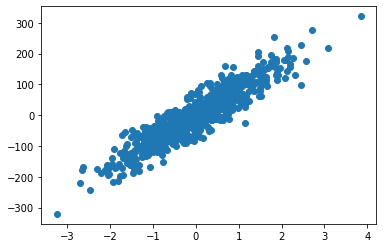

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

plt.scatter(X, y)
plt.show()

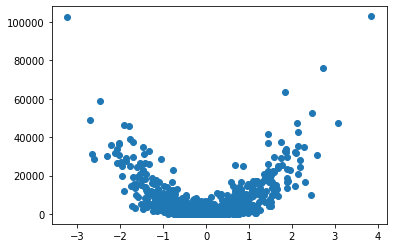

In [ ]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

Podemos fazer uma regressão linear...

Intercepto (b0): 7279.765399809274
Demais parâmetros (b1, ..., bn): [1303.44379459]

Modelo treinado:


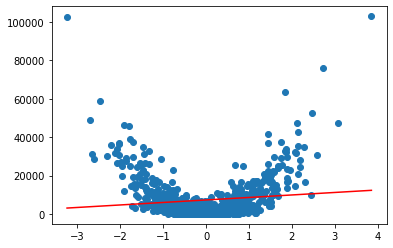

Métricas de treino:

R^2: 0.01
MAE: 7181.56
RMSE: 10802.78

Métricas de teste:

R^2: -0.05
MAE: 8121.31
RMSE: 13395.52


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*x_plot

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Hipótese atual:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrado que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

________

Um outro exemplo: considere uma hipótese linear para um modelo com duas features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

Caso queiramos produzir um modelo quadrático, temos que incluir os termos $x_1^2, x_2^2$ e também $x_1x_2$ (que também é quadrático), de modo que nossa hipótese fica sendo:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

O que não deixa de ser uma **regressão linear múltipla** de 5 variáveis ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ e $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

E assim por diante! ;)

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

Intercepto (b0): 934.4564684580137
Demais parâmetros (b1, ..., bn): [6661.31189456]

Modelo treinado:


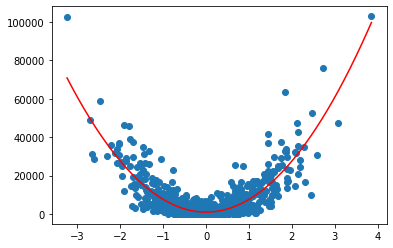

Métricas de treino:

R^2: 0.73
MAE: 3581.64
RMSE: 5636.74

Métricas de teste:

R^2: 0.73
MAE: 4326.26
RMSE: 6778.47


In [ ]:
# isso a feature z = x^2
# note: isso é um PRE PROCESSAMENTO DOS DADOS!!! nao to mexendo em NADA do estimador
Z = X**2

# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o Z ao inves do X
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot**2)

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Agora sim, um modelo beeem melhor!!

E se quisermos usar a hipótese quadrática mais completa, com ambos os termos linear e quadrático? (Isto é, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

Bem simples: basta passarmos as duas features pro sklearn:

In [ ]:
X_df = pd.DataFrame(X, columns=["X"])

In [ ]:
X_df

,X
0,-1.197878
1,-1.024388
2,-0.269407
3,0.384065
4,-0.107030
...,...
695,-0.825497
696,0.081874
697,0.012592
698,1.882024


In [ ]:
X_df["Z"] = X_df["X"]**2

In [ ]:
X_df

,X,Z
0,-1.197878,1.434911
1,-1.024388,1.049370
2,-0.269407,0.072580
3,0.384065,0.147506
4,-0.107030,0.011455
...,...,...
695,-0.825497,0.681446
696,0.081874,0.006703
697,0.012592,0.000159
698,1.882024,3.542016


Intercepto (b0): 927.9689134531227
Demais parâmetros (b1, ..., bn): [ -65.6131123  6667.88666831]

Modelo treinado:


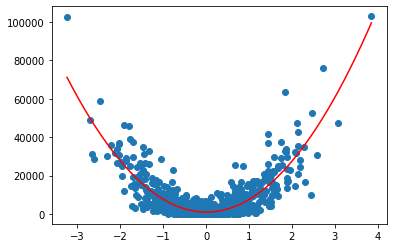

Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [ ]:
# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o X_df (com as duas variaveis) ao inves do X
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot) + reg_lin.coef_[1]*(x_plot**2)

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

No geral, dá pra ir aumentando a ordem dos polinomios criando features de ordem maior uma a uma:

In [ ]:
X_df["A"] = X_df["X"]**3
X_df["B"] = X_df["X"]**4

In [ ]:
X_df

,X,Z,A,B
0,-1.197878,1.434911,-1.718849,2.058971e+00
1,-1.024388,1.049370,-1.074962,1.101177e+00
2,-0.269407,0.072580,-0.019554,5.267863e-03
3,0.384065,0.147506,0.056652,2.175810e-02
4,-0.107030,0.011455,-0.001226,1.312284e-04
...,...,...,...,...
695,-0.825497,0.681446,-0.562531,4.643681e-01
696,0.081874,0.006703,0.000549,4.493523e-05
697,0.012592,0.000159,0.000002,2.514399e-08
698,1.882024,3.542016,6.666161,1.254588e+01


Intercepto (b0): 939.9766852933644
Demais parâmetros (b1, ..., bn): [  26.65263951 6632.87907468  -36.92940233   10.0586674 ]

Modelo treinado:


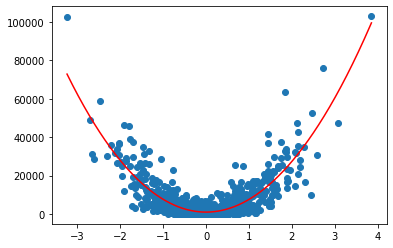

Métricas de treino:

R^2: 0.73
MAE: 3581.20
RMSE: 5636.02

Métricas de teste:

R^2: 0.73
MAE: 4321.62
RMSE: 6722.47


In [ ]:
# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o X_df (com as duas variaveis) ao inves do X
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = (reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot)
          + reg_lin.coef_[1]*(x_plot**2) + reg_lin.coef_[2]*(x_plot**3)
          + reg_lin.coef_[3]*(x_plot**4))

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

O procedimento acima é bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é nosso primeiro exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem 
ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo.

Lembre-se de fitar o transformados sempre nos dados de treino, apenas! Neste caso, não faz muita diferença, mas, para nos acostumarmos a isso, vamos fazer aqui também!

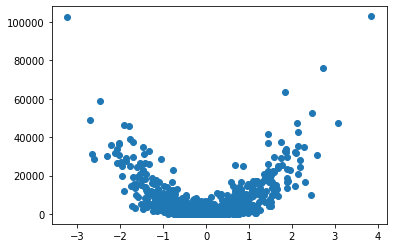

In [ ]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [ ]:
vars(pf)

{'degree': 2,
 'interaction_only': False,
 'include_bias': False,
 'order': 'C',
 'n_features_in_': 1,
 '_min_degree': 0,
 '_max_degree': 2,
 'n_output_features_': 2,
 '_n_out_full': 2}

In [ ]:
pf.n_features_in_

1

In [ ]:
pf.n_output_features_

2

In [ ]:
# das duas features que teremos depois da transformação
# a primeira tem grau 1
# a segunda tem grau 2

pf.powers_

array([[1],
       [2]], dtype=int64)

In [ ]:
X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)

In [ ]:
X_train_transf

array([[ 0.51378595,  0.263976  ],
       [ 0.2597225 ,  0.06745578],
       [-0.11473644,  0.01316445],
       ...,
       [ 0.71095997,  0.50546408],
       [ 1.1593298 ,  1.34404559],
       [ 0.47323762,  0.22395385]])

In [ ]:
X_test_transf

array([[ 1.47789404e+00,  2.18417081e+00],
       [ 6.90143992e-01,  4.76298729e-01],
       [ 8.23170584e-01,  6.77609810e-01],
       [-3.84555544e-01,  1.47882967e-01],
       [-5.95253561e-02,  3.54326801e-03],
       [-6.77161712e-01,  4.58547984e-01],
       [-8.97254371e-01,  8.05065407e-01],
       [-8.60413365e-01,  7.40311159e-01],
       [ 5.29804178e-01,  2.80692467e-01],
       [-4.26881070e-01,  1.82227448e-01],
       [ 3.10907566e-01,  9.66635143e-02],
       [-7.92872832e-01,  6.28647328e-01],
       [ 1.52302986e+00,  2.31961994e+00],
       [-4.01220472e-01,  1.60977867e-01],
       [-8.02277269e-01,  6.43648817e-01],
       [ 3.26927374e-01,  1.06881508e-01],
       [ 1.30740577e-01,  1.70930985e-02],
       [-2.30934530e-01,  5.33307572e-02],
       [-7.73789199e-01,  5.98749725e-01],
       [ 3.24083969e-01,  1.05030419e-01],
       [ 1.84633859e-01,  3.40896617e-02],
       [-5.53649305e-01,  3.06527553e-01],
       [-5.24520266e-01,  2.75121510e-01],
       [ 8.

Tudo numa unica célula:

Número original de features: 1
Número de features no espaço transformado: 2


Intercepto (b0): 927.9689134531254
Demais parâmetros (b1, ..., bn): [ -65.6131123  6667.88666831]

Modelo treinado:


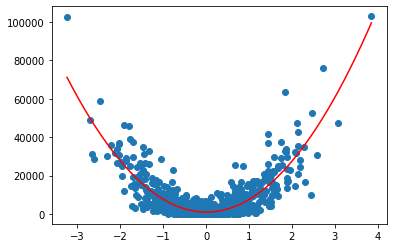

Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

# pra plotar a hipotese automaticamente
# y = bo + b1*x^1 + b2*x^2 + .... + bn*x^n

# y_plot = reg_lin.intercept_

# for i in range(len(reg_lin.coef_)):
    
#     y_plot = y_plot + reg_lin.coef_[i]*(x_plot**(i+1))

y_plot = reg_lin.intercept_

for n, b_n in enumerate(reg_lin.coef_):
    
    y_plot = y_plot + b_n*(x_plot**(n+1))

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Em aulas anteriores, discutimos sobre a **maldição da dimensionalidade**, e como é fácil overfitar um modelo ao aumentarmos a dimensionalidade. Vamos ver isso claramente?

In [ ]:
# prototipo pra salvar resultados

# resultados = {"num_features" : [1, 2, 3],
#               "mae_train" : [425432, 454253324, 435645654676798],
#               "mae_test" : [42424325, 5434234253, 435645654676798]}

# pd.DataFrame(resultados)

Prototipo do que fizemos abaixo

In [ ]:
resultados = {"num_features" : [],
              "mae_train" : [],
              "mae_test" : []}

In [ ]:
resultados["num_features"].append(4)
resultados["mae_train"].append(5453435)
resultados["mae_test"].append(45345345)

In [ ]:
resultados

{'num_features': [4], 'mae_train': [5453435], 'mae_test': [45345345]}

Agora sim:

In [ ]:
# dicionario de resultados do experimento
resultados = {"num_features" : [],
              "mae_train" : [],
              "mae_test" : []}

for grau in range(1, 16):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================

    pf = PolynomialFeatures(degree=grau, include_bias=False)

    pf.fit(X_train)

    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    # ======================================

    reg_lin = LinearRegression()

    reg_lin.fit(X_train, y_train)

    # ======================================

    # predições de treino
    y_pred_train = reg_lin.predict(X_train)

    print("Métricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = reg_lin.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    
    print()
    print("#"*80)
    print()
    
    # ======================================
    
    resultados["num_features"].append(pf.n_output_features_)
    resultados["mae_train"].append(mean_absolute_error(y_train, y_pred_train))
    resultados["mae_test"].append(mean_absolute_error(y_test, y_pred_test))

Número original de features: 1
Número de features no espaço transformado: 1


Métricas de treino:

R^2: 0.01
MAE: 7181.56
RMSE: 10802.78

Métricas de teste:

R^2: -0.05
MAE: 8121.31
RMSE: 13395.52

################################################################################

Número original de features: 1
Número de features no espaço transformado: 2


Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88

################################################################################

Número original de features: 1
Número de features no espaço transformado: 3


Métricas de treino:

R^2: 0.73
MAE: 3581.40
RMSE: 5636.21

Métricas de teste:

R^2: 0.73
MAE: 4325.38
RMSE: 6752.01

################################################################################

Número original de features: 1
Número de features no espaço transformado: 4


Métricas de treino:

R^2: 0.73
MAE: 3581.20
RMSE: 5636.02

Métricas de teste:

R^2: 0.73

In [ ]:
# dataframe de resultados do experimento

df_resultados = pd.DataFrame(resultados)

In [ ]:
df_resultados

,num_features,mae_train,mae_test
0,1,7181.560933,8121.313244
1,2,3581.933778,4331.752527
2,3,3581.400263,4325.382292
3,4,3581.195690,4321.621979
4,5,3579.894828,4340.232799
5,6,3581.464832,4408.618829
6,7,3544.409828,5078.571268
7,8,3543.895806,5241.180968
8,9,3538.829341,6027.308969
9,10,3541.570521,6785.407158


In [ ]:
df_resultados.describe()

,num_features,mae_train,mae_test
count,15.000000,15.000000,15.000000
mean,8.000000,3782.207315,18996.528081
std,4.472136,941.560606,37599.406203
min,1.000000,3436.796917,4321.621979
25%,4.500000,3540.199931,4374.425814
50%,8.000000,3545.715130,5241.180968
75%,11.500000,3581.297976,9749.636557
max,15.000000,7181.560933,147068.338783


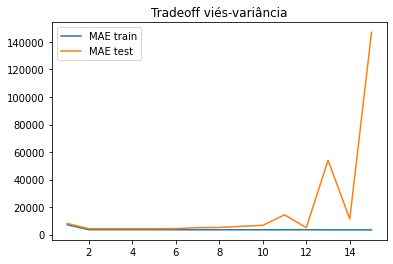

In [ ]:
plt.title("Tradeoff viés-variância")

plt.plot(df_resultados["num_features"], df_resultados["mae_train"], label="MAE train")
plt.plot(df_resultados["num_features"], df_resultados["mae_test"], label="MAE test")

plt.legend()
plt.show()

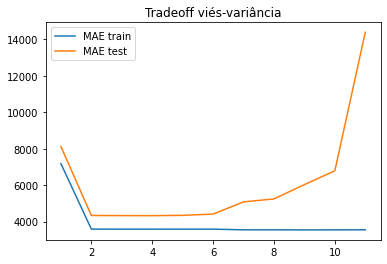

In [ ]:
plt.title("Tradeoff viés-variância")

plt.plot(df_resultados[:11]["num_features"], df_resultados[:11]["mae_train"], label="MAE train")
plt.plot(df_resultados[:11]["num_features"], df_resultados[:11]["mae_test"], label="MAE test")

plt.legend()
plt.show()

_____________
_____________
_____________

Agora que já entendemos a técnica em um dataset bem simples, vamos voltar pra um dataset real!

Vamos voltar pros dados da precificação de casas -- ali, o poly_features se mostrará ainda mais útil!

In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=1, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 36


Intercepto (b0): -457586.59844781517
Demais parâmetros (b1, ..., bn): [-2.09840235e+02 -6.22245251e+01  4.29203229e-01  1.96542920e+04
  5.07228946e+03  2.86898275e+02  1.25155507e+02  2.64927205e+01
  4.75018636e+00  4.49071348e+00 -3.00319582e+00  6.23770403e+00
  1.03503162e+01  1.39030809e+01  5.09112525e+00  2.93445223e+01
  1.15651290e+04  1.33874840e+03  5.01014376e+03 -1.95544480e+03
 -9.48684978e+03 -2.14750237e+04  4.58715787e+03  4.79391824e+03
 -1.73822466e+01  1.83445528e+04  5.86043038e+00  2.02568027e+01
 -3.14383329e+00  1.18478232e+01  5.86571031e+01  6.69736175e+01
 -6.19269025e+01 -3.91009199e+00 -5.28006128e+00 -1.91225833e+02]

Métricas de treino:

R^2: 0.81
MAE: 22141.31
RMSE: 35608.43

Métricas de teste:

R^2: 0.80
MAE: 23615.83
RMSE: 39852.60


In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 702


Intercepto (b0): 2555291940.531257
Demais parâmetros (b1, ..., bn): [-1.53160293e+04  6.17526697e+03 -6.88263683e+02 -1.60964565e+05
 -1.88158574e+06 -1.39901772e+05 -8.64893479e+04  3.04491653e+02
 -2.64978613e+03  1.08374952e+04 -1.08870869e+04 -2.67301553e+03
  9.01051085e+03 -1.78248038e+03 -2.59554693e+01  7.19552061e+03
 -5.45975287e+06 -5.04500833e+06 -6.97076347e+06  4.06279426e+05
  3.58052476e+06 -8.91070647e+05 -3.28635067e+06  4.55316849e+06
  1.55101032e+04  1.36089114e+06  1.37393689e+04  1.22485762e+04
 -6.76810233e+03 -7.18350687e+04  2.73713826e+00 -7.72383253e+04
  9.90561003e-01  3.81870450e-01  2.97089343e+04 -2.32730942e+06
  3.22492665e-01 -4.52472249e+00  1.53991610e-02  2.70643420e+00
  4.91253716e+01  6.15969245e+00  1.24620493e+00  1.32234413e-01
 -3.73260044e-01 -2.20663277e-01 -2.02733938e-01 -8.45342049e-03
  1.55975430e+00  7.01061082e-01 -3.87730265e-01 -1.08684827e+00
 -4.22

Esete ultimo modelo tinha muuuuuito mais parametros que observações, portanto, aprendeu perfeitamente até mesmo os ruidos da base de treino!!

Com quantas features o modelo final foi construído?

In [ ]:
pf.n_output_features_

702

Nossa hipótese é:

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{702} x_{702}$$

Ou seja, temos um modelo **com muitos parâmetros**, ou seja, **muito complexo!**

Com tantos parâmetros assim, há muitos **graus de liberdade** pra que a hipótese se ajuste até às particularidades da base de treino... 

O resultado é evidente: temos um modelo altamente **overfitado**, dado o número enorme de features após o transformer -- e isso porque estamos utilizando apenas features quadráticas, imagine se tivéssemos usado features de grau maior!

É de se imaginar que muitas destas features não deveriam estar aí, não é mesmo?

Oras, uma forma interessante de eliminar features é fazendo o que chamamos de **feature selection**.

A ideia é a seguinte: gostaríamos sim de introduzir features quadráticas, aumentando um pouco a complexidade da hipótese, **mas não tanto!**. 

E é isso que conseguiremos fazer com as técnicas de **regularização**.

Antes, vamos chutar mais o balde...

In [ ]:
# uma saida, é limitar a transformação

df = pd.read_csv("../datasets/house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 666


Intercepto (b0): 307029201.26442385
Demais parâmetros (b1, ..., bn): [-4.92688469e+04 -7.79534754e+04 -5.62481390e+02 -4.69816915e+05
 -1.95672271e+06 -7.48116773e+03 -5.21315163e+04  2.40128936e+03
 -3.36845946e+03  1.13069858e+04 -1.05219022e+04 -2.57588435e+03
  6.87291795e+03 -2.03938881e+03 -8.95722332e+00  4.85345346e+03
 -4.35527763e+06 -1.82362768e+06 -6.84150160e+06  5.06398776e+05
  3.29472777e+06 -8.80208583e+06 -2.76442219e+06  5.63347569e+06
 -9.69669147e+04  2.22272545e+06  8.89978067e+03  1.11469908e+04
 -1.26798986e+04 -3.85822532e+04  1.91727620e+00 -5.03263018e+04
  3.12128536e+00 -7.88150694e-02  7.46973696e+04 -1.30608631e+05
 -6.04587158e+00  1.80514854e-02  4.54570742e+01  5.95078454e+01
  5.80273137e+00 -8.73928001e-02  1.72841353e-01  3.25445213e-01
  6.46242970e-01  5.13838553e-01 -6.46287430e-01  1.65866009e+00
  1.00404981e+00 -1.29638576e+00 -1.49565437e+00 -3.79952444e+01
 -1.5

 -6.48452518e+00 -5.26258742e+01]

Métricas de treino:

R^2: 0.98
MAE: 8598.77
RMSE: 12677.49

Métricas de teste:

R^2: -0.11
MAE: 45745.52
RMSE: 93601.20


In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 9138


Intercepto (b0): -1543523.4658613082
Demais parâmetros (b1, ..., bn): [-1.41841203e-08  8.23263504e-09  1.01718051e-06 ...  1.41556641e-03
 -5.31294945e-03 -2.77966119e-03]

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -11.86
MAE: 158852.93
RMSE: 318495.09


O que podemos dizer sobre este modelo?

**Claro overfitting!**

____
____
____

Pra nosso código ficar mais orgamizado, podemos fazer uma função para a modelagem (depois vcs podem refazer os passos acima com a função, ajuda a organizar o código!)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    
def poly_reg(X, y, degree):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================
    # passo adicional: criando features polinomiais
    # pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

    pf = PolynomialFeatures(degree=degree, include_bias=False)

    # pra gente se acostumar: fit só em dados de treino!!!!
    pf.fit(X_train)

    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    # ======================================

    reg_lin = LinearRegression()

    reg_lin.fit(X_train, y_train)

    # ======================================

    # predições de treino
    y_pred_train = reg_lin.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = reg_lin.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

In [ ]:
poly_reg(X, y, degree=1)

Número original de features: 36
Número de features no espaço transformado: 36

Métricas de treino:

R^2: 0.81
MAE: 22141.31
RMSE: 35608.43

Métricas de teste:

R^2: 0.80
MAE: 23615.83
RMSE: 39852.60


In [ ]:
poly_reg(X, y, degree=2)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.98
MAE: 8254.71
RMSE: 12119.72

Métricas de teste:

R^2: -17.03
MAE: 70166.96
RMSE: 377155.38


In [ ]:
poly_reg(X, y, degree=3)

Número original de features: 36
Número de features no espaço transformado: 9138

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -11.86
MAE: 158852.93
RMSE: 318495.09


_____

## 2) Regularização

Neste ponto, é muito importante que falemos sobre **regularização**.

O objetivo da regularização é **diminuir a complexidade** de modelos, de modo a evitar que particularidades da base de treino (ruídos) sejam aprendidos (ou seja, evitar overfitting!)

Uma outra forma de enxergar regularização: **diminuição do espaço de hipóteses!**

<img src=https://curso-r.github.io/main-intro-ml/slides/static/img/erro_treino_erro_teste.png width=500>

Regularização: problema de otimização VINCULADO!! ou seja, com restrições.

problema de otimização: otimização da função de custo, que é o objetivo da aprendizagem, pra determinar o $\hat{\vec{b}}$

restrições: é o que determina se temos L1 (lasso) ou L2 (ridge)

### Regressão linear (sem regularização)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/5408b0a7-85f3-4824-ad68-44867121ecb9.png width=800>

### L1 (Lasso)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/acabe9da-07ba-4337-b467-dd2701a40cc8.png width=900>

### L2 (Ridge)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/46eda310-fb2f-498b-b455-593183de1dd7.png width=900>

Para saber como relacionar $t$ com $\lambda$, veja [este post](https://stats.stackexchange.com/questions/259177/expressing-the-lasso-regression-constraint-via-the-penalty-parameter) ou então [este](https://stats.stackexchange.com/questions/90648/kkt-versus-unconstrained-formulation-of-lasso-regression) -- discussões bem matemáticas!

Observações importantes:

- $\lambda$ é um parâmetro que controla a "força" da regularização<br><br>
- **L1 pode zerar coeficientes** - faz feature selection<br><br>
- **L2 apenas diminui o tamanho de coeficientes** - não faz feature selection<br><br>

<img src=https://ugc.futurelearn.com/uploads/assets/2b/fe/2bfe399e-503e-4eae-9138-a3d7da738713.png width=900>



Geometricamente:

<img src=https://www.astroml.org/_images/fig_lasso_ridge_1.png width=800>

No sklearn, é possível fazer um modelo de regressão linear regularizado facilmente com as classes respectivas:

- [Regularização L2/Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- [Regularização L1/Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Há, no sklearn, também uma implementação para um tipo de regularização conhecida como **Elastic Net**:

<img src=https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png width=900>

A classe se chama [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)



Vamos utilizar regularização no dataset das casas, juntamente com as features polinomiais:

> **IMPORTANTE**: como os métodos de regularização são baseados na norma do vetor de parâmetros, é muito importante que as features sejam escaladas para que os métodos funcionem bem!

Isso porque a escala das features irá influenciar a regularização aplicada ao parâmetro respectivo!

Para eliminar este efeito, escalar os dados é muito importante!

Vamos visualizar concretamente como a regularização de fato simplifica a hipótese! Pra isso, considere os pontos a seguir:

In [ ]:
np.random.seed(42)
ruido = np.random.normal(0, 1, 10)

In [ ]:
ruido.reshape(-1, 1)

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854],
       [ 1.52302986],
       [-0.23415337],
       [-0.23413696],
       [ 1.57921282],
       [ 0.76743473],
       [-0.46947439],
       [ 0.54256004]])

In [ ]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

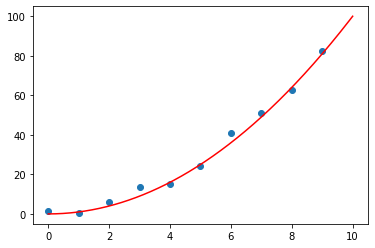

In [ ]:
X = np.arange(10)
y = X**2

np.random.seed(42)
ruido = np.random.normal(0, 3, 10)
y = y + ruido

# isso é só pra poder treinar o modelo com 1 feature
X = X.reshape(-1, 1)

x_plot = np.linspace(0, 10, 1000)
y_plot = x_plot**2

plt.scatter(X, y)

plt.plot(x_plot, y_plot, color="r")

plt.show()

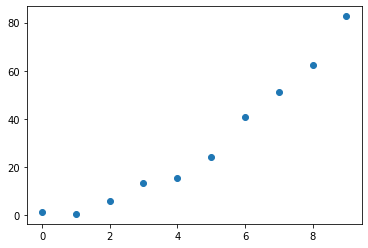

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def calc_y_plot(estimator, x_plot):

    y_plot = estimator.intercept_

    for n, b_n in enumerate(estimator.coef_):

        y_plot = y_plot + b_n*(x_plot**(n+1))
    
    return y_plot

In [ ]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False).fit(X)

X_transf = pf.transform(X)

X_transf

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.],
       [ 7., 49.],
       [ 8., 64.],
       [ 9., 81.]])

In [ ]:
mms = MinMaxScaler().fit(X_transf)

X_transf =  mms.transform(X_transf)

X_transf

array([[0.        , 0.        ],
       [0.11111111, 0.01234568],
       [0.22222222, 0.04938272],
       [0.33333333, 0.11111111],
       [0.44444444, 0.19753086],
       [0.55555556, 0.30864198],
       [0.66666667, 0.44444444],
       [0.77777778, 0.60493827],
       [0.88888889, 0.79012346],
       [1.        , 1.        ]])

In [ ]:
def reg_poly_plot(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)

    # =====================================

    print("\nModelo treinado:")

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot = calc_y_plot(reg_lin, x_plot)

    plt.scatter(X_transf[:, 0], y)

    plt.plot(x_plot, y_plot, color="r")
    plt.show()

Número original de features: 1
Número de features no espaço transformado: 1

Modelo treinado:


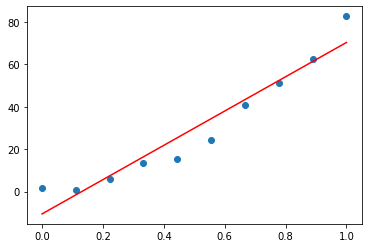

################################################################################

Número original de features: 1
Número de features no espaço transformado: 2

Modelo treinado:


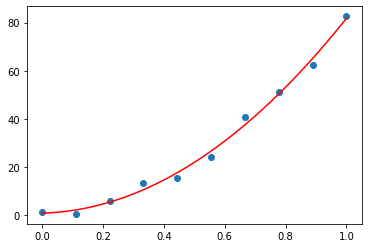

################################################################################

Número original de features: 1
Número de features no espaço transformado: 3

Modelo treinado:


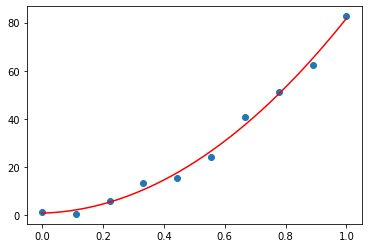

################################################################################

Número original de features: 1
Número de features no espaço transformado: 4

Modelo treinado:


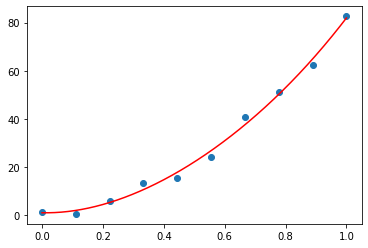

################################################################################

Número original de features: 1
Número de features no espaço transformado: 5

Modelo treinado:


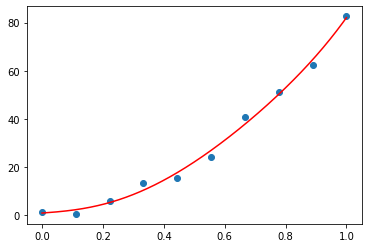

################################################################################

Número original de features: 1
Número de features no espaço transformado: 6

Modelo treinado:


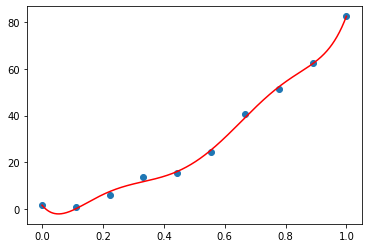

################################################################################

Número original de features: 1
Número de features no espaço transformado: 7

Modelo treinado:


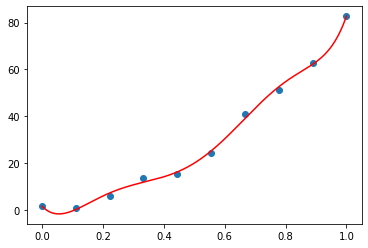

################################################################################

Número original de features: 1
Número de features no espaço transformado: 8

Modelo treinado:


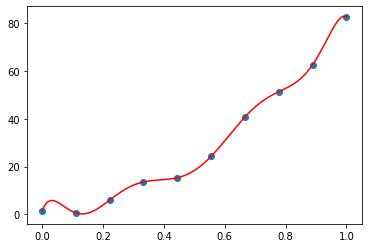

################################################################################

Número original de features: 1
Número de features no espaço transformado: 9

Modelo treinado:


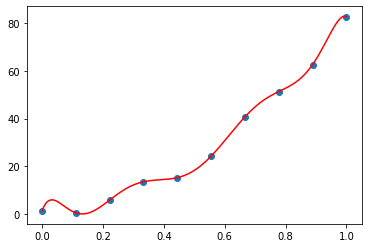

################################################################################

Número original de features: 1
Número de features no espaço transformado: 10

Modelo treinado:


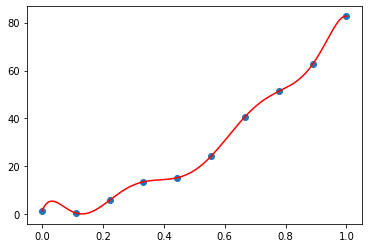

################################################################################



In [ ]:
for degree in range(1, 11):
    
    reg_poly_plot(X, y, degree)
    
    print("#"*80)
    print()

Agora, vamos regularizar!

In [ ]:
from sklearn.linear_model import Ridge, Lasso

def reg_poly_regularized_plot(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)

    # =====================================

    print("\nModelo treinado:")
    
    plt.scatter(X_transf[:, 0], y)

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot_reg_lin = calc_y_plot(reg_lin, x_plot)
    plt.plot(x_plot, y_plot_reg_lin, color="r", label="rl", ls=":")
    
    y_plot_reg_l1 = calc_y_plot(reg_l1, x_plot)
    plt.plot(x_plot, y_plot_reg_l1, color="orange", label="L1")
    
    y_plot_reg_l2 = calc_y_plot(reg_l2, x_plot)
    plt.plot(x_plot, y_plot_reg_l2, color="green", label="L2")
    
    plt.legend()
    plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# pra ficar mais fácil de ver os parâmetros, vamos fixar três casas decimais
np.set_printoptions(formatter={'float': lambda x: "{:.3f}".format(x)})

def reg_poly_regularized_plot2(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)
    
    print(f"\nParâmetros modelo não regularizado:\n{reg_lin.intercept_:.3f}\n{reg_lin.coef_}")
    print(f"\nParâmetros modelo com L1 (Lasso):\n{reg_l1.intercept_:.3f}\n{reg_l1.coef_}")
    print(f"\nParâmetros modelo com L2 (Ridge):\n{reg_l2.intercept_:.3f}\n{reg_l2.coef_}")

    # =====================================

    print("\nModelo treinado:")
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].scatter(X_transf[:, 0], y)
    axs[1].scatter(X_transf[:, 0], y)

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot_reg_lin = calc_y_plot(reg_lin, x_plot)
    axs[0].plot(x_plot, y_plot_reg_lin, color="r", label="RL", ls=":")
    axs[1].plot(x_plot, y_plot_reg_lin, color="r", label="RL", ls=":")
    
    y_plot_reg_l1 = calc_y_plot(reg_l1, x_plot)
    axs[0].plot(x_plot, y_plot_reg_l1, color="orange", label="L1")
    
    y_plot_reg_l2 = calc_y_plot(reg_l2, x_plot)
    axs[1].plot(x_plot, y_plot_reg_l2, color="green", label="L2")
    
    axs[0].legend()
    axs[1].legend()
    plt.show()

Número original de features: 1
Número de features no espaço transformado: 1

Parâmetros modelo não regularizado:
-10.563
[80.814]

Parâmetros modelo com L1 (Lasso):
-5.654
[70.996]

Parâmetros modelo com L2 (Ridge):
9.455
[40.778]

Modelo treinado:


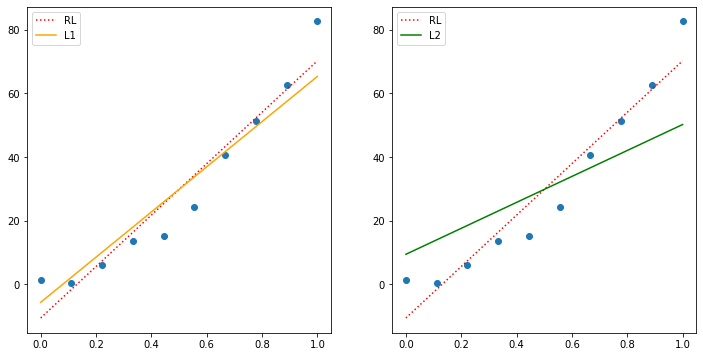

################################################################################

Número original de features: 1
Número de features no espaço transformado: 2

Parâmetros modelo não regularizado:
0.915
[3.338 77.476]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470]

Parâmetros modelo com L2 (Ridge):
6.503
[25.812 29.660]

Modelo treinado:


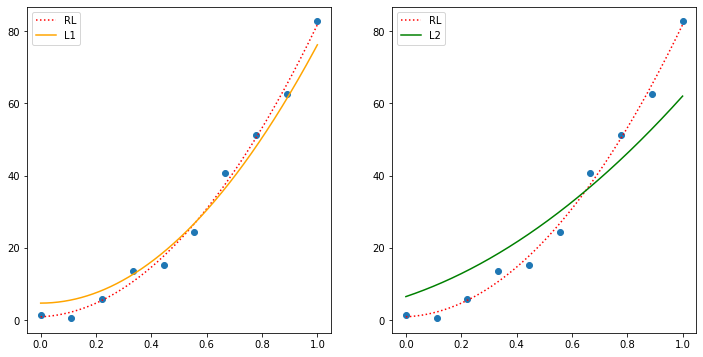

################################################################################

Número original de features: 1
Número de features no espaço transformado: 3

Parâmetros modelo não regularizado:
0.906
[3.490 77.075 0.267]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000]

Parâmetros modelo com L2 (Ridge):
6.379
[19.832 21.754 21.223]

Modelo treinado:


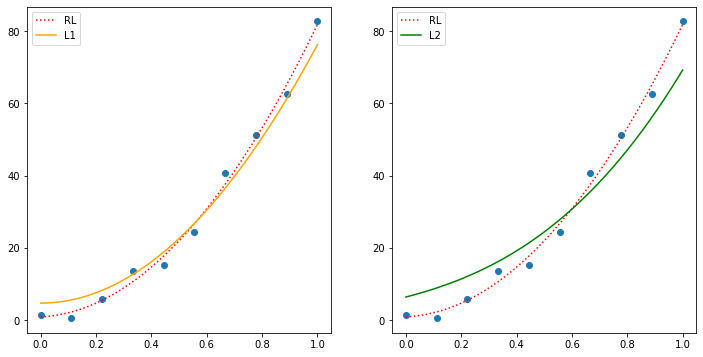

################################################################################

Número original de features: 1
Número de features no espaço transformado: 4

Parâmetros modelo não regularizado:
1.074
[-2.810 108.889 -50.762 25.514]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
6.711
[17.239 17.852 16.692 15.385]

Modelo treinado:


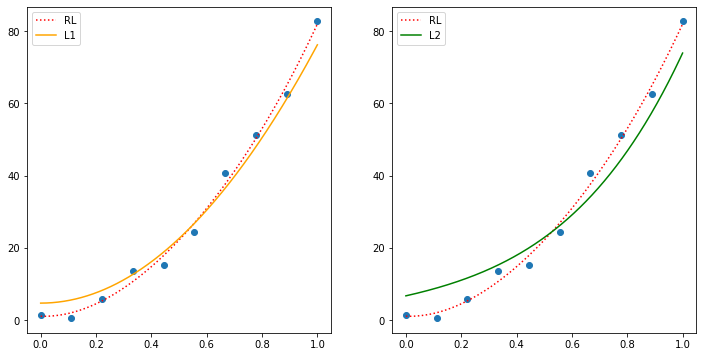

################################################################################

Número original de features: 1
Número de features no espaço transformado: 5

Parâmetros modelo não regularizado:
0.944
[9.068 9.881 229.103 -295.273 128.315]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
7.042
[16.072 15.833 14.190 12.600 11.283]

Modelo treinado:


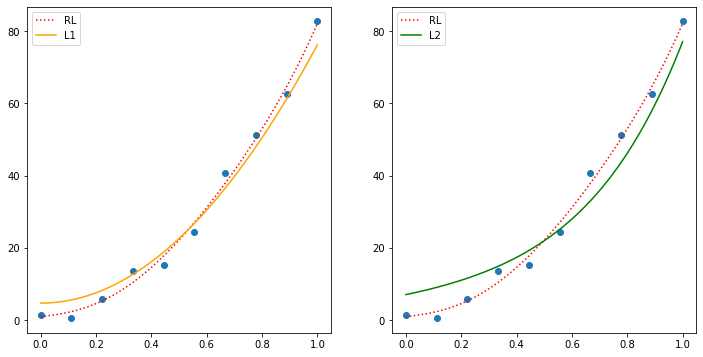

################################################################################

Número original de features: 1
Número de features no espaço transformado: 6

Parâmetros modelo não regularizado:
1.575
[-159.462 2089.083 -8719.978 16998.609 -15254.895 5127.737]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
7.293
[15.545 14.760 12.769 10.956 9.491 8.340]

Modelo treinado:


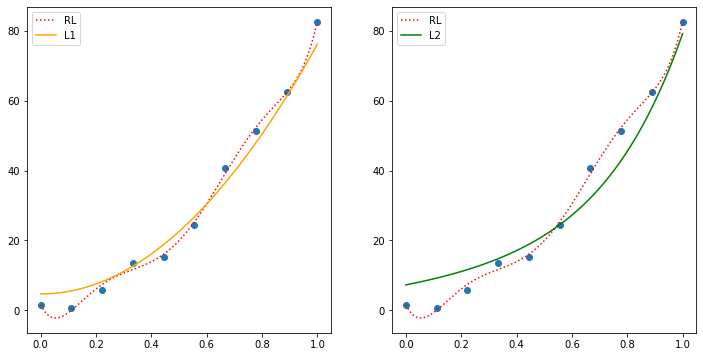

################################################################################

Número original de features: 1
Número de features no espaço transformado: 7

Parâmetros modelo não regularizado:
1.553
[-135.524 1694.076 -6377.541 10375.227 -5596.073 -1881.732 2002.705]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000 0.000 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
7.469
[15.315 14.181 11.949 9.969 8.388 7.154 6.193]

Modelo treinado:


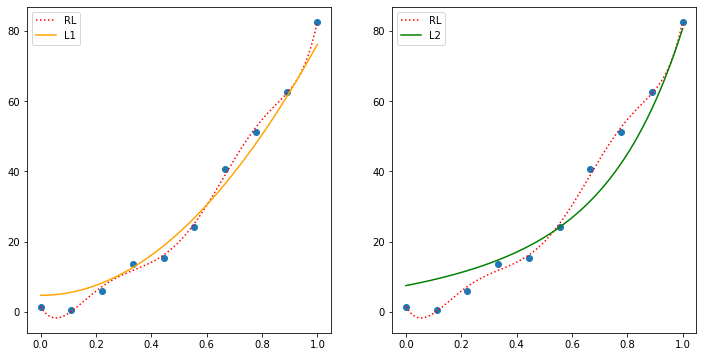

################################################################################

Número original de features: 1
Número de features no espaço transformado: 8

Parâmetros modelo não regularizado:
1.490
[313.567 -7362.483 61932.271 -247319.766 530900.135 -627793.975 385214.283
 -95802.894]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000 0.000 0.000 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
7.586
[15.223 13.869 11.470 9.371 7.702 6.403 5.393 4.604]

Modelo treinado:


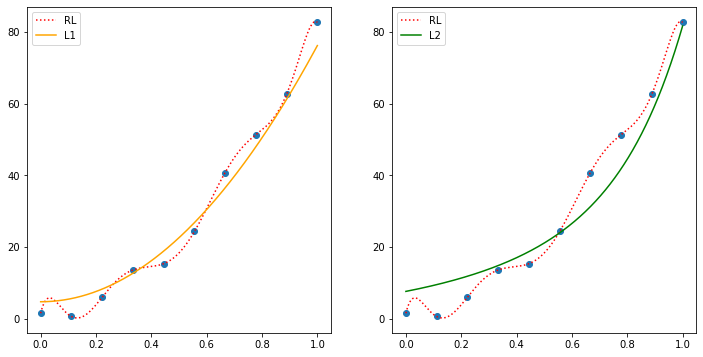

################################################################################

Número original de features: 1
Número de features no espaço transformado: 9

Parâmetros modelo não regularizado:
1.490
[330.446 -7752.348 65443.933 -263817.086 575844.962 -701388.407 456596.311
 -133569.180 8392.508]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000 0.000 0.000 0.000 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
7.664
[15.195 13.701 11.191 9.007 7.275 5.927 4.879 4.060 3.414]

Modelo treinado:


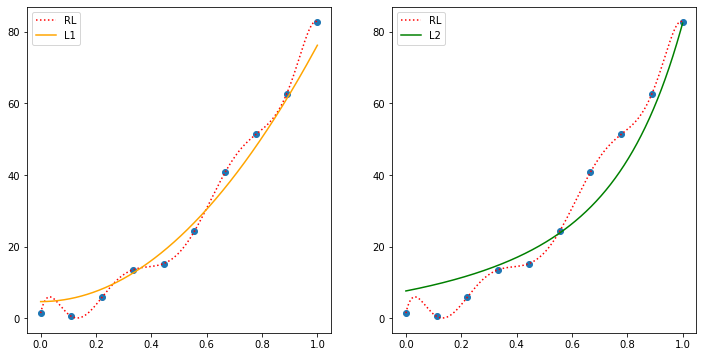

################################################################################

Número original de features: 1
Número de features no espaço transformado: 10

Parâmetros modelo não regularizado:
1.490
[292.635 -6789.651 55546.376 -208846.527 391724.200 -312086.054 -66694.274
 300014.447 -193448.146 40368.131]

Parâmetros modelo com L1 (Lasso):
4.697
[0.000 71.470 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]

Parâmetros modelo com L2 (Ridge):
7.714
[15.195 13.612 11.028 8.786 7.008 5.625 4.549 3.708 3.043 2.514]

Modelo treinado:


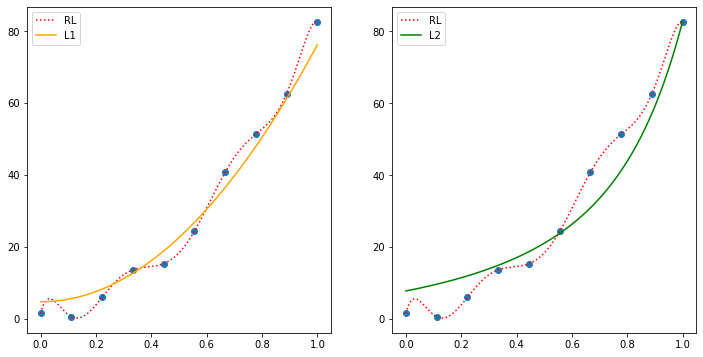

################################################################################



In [ ]:
for degree in range(1, 11):
    
    reg_poly_regularized_plot2(X, y, degree)
    
    print("#"*80)
    print()

Número original de features: 1
Número de features no espaço transformado: 1

Modelo treinado:


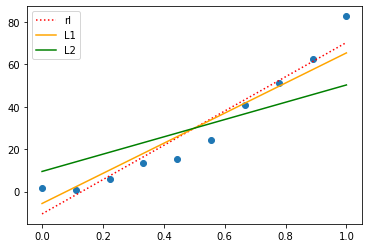

################################################################################

Número original de features: 1
Número de features no espaço transformado: 2

Modelo treinado:


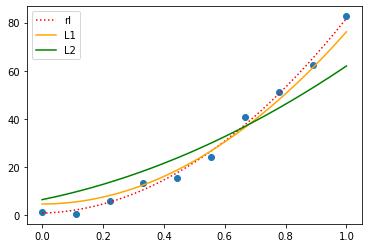

################################################################################

Número original de features: 1
Número de features no espaço transformado: 3

Modelo treinado:


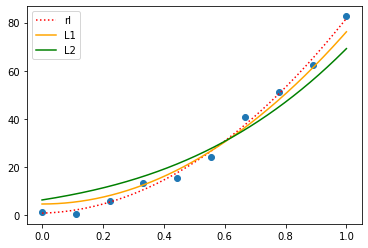

################################################################################

Número original de features: 1
Número de features no espaço transformado: 4

Modelo treinado:


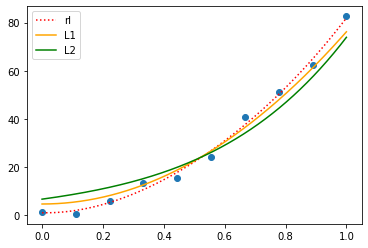

################################################################################

Número original de features: 1
Número de features no espaço transformado: 5

Modelo treinado:


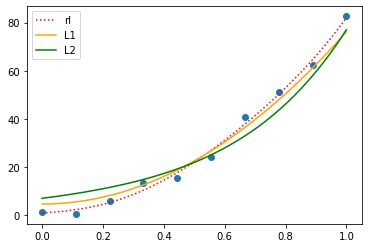

################################################################################

Número original de features: 1
Número de features no espaço transformado: 6

Modelo treinado:


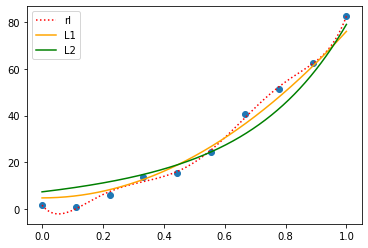

################################################################################

Número original de features: 1
Número de features no espaço transformado: 7

Modelo treinado:


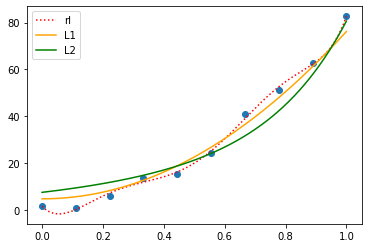

################################################################################

Número original de features: 1
Número de features no espaço transformado: 8

Modelo treinado:


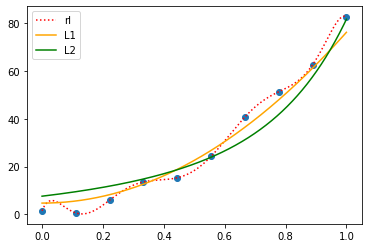

################################################################################

Número original de features: 1
Número de features no espaço transformado: 9

Modelo treinado:


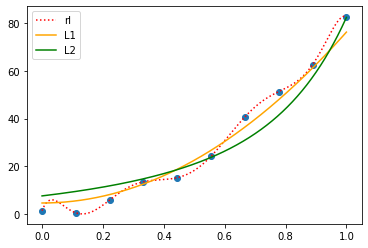

################################################################################

Número original de features: 1
Número de features no espaço transformado: 10

Modelo treinado:


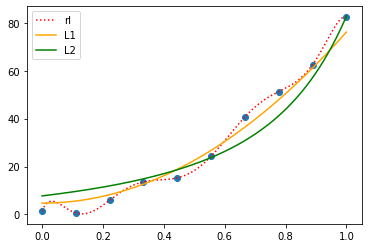

################################################################################



In [ ]:
for degree in range(1, 11):
    
    reg_poly_regularized_plot(X, y, degree)
    
    print("#"*80)
    print()

**Lição de casa**: altere a função acima pra ter mais um argumento: alpha.

Daí, varie também o alpha (força de regularização).

_________
Vamos agora voltar pro dataset de precificação de casas:

______________
______________
______________

Comentário: discutimos já que é importante escalar as features quando formos usar regularização.

Mas, é muito importante que o scaling dos dados seja O ÚLTIMO PASSO!

Ou seja, se também quisermos fazer o polynomial features, temos que fazer ANTES do scaler. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(X)
print()

pf = PolynomialFeatures(degree=3, include_bias=False).fit(X)
X_transf = pf.transform(X)

print(X_transf)
print()

ss = StandardScaler().fit(X_transf)
X_transf = ss.transform(X_transf)

print(X_transf)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

[[0.000 0.000 0.000]
 [1.000 1.000 1.000]
 [2.000 4.000 8.000]
 [3.000 9.000 27.000]
 [4.000 16.000 64.000]
 [5.000 25.000 125.000]
 [6.000 36.000 216.000]
 [7.000 49.000 343.000]
 [8.000 64.000 512.000]
 [9.000 81.000 729.000]]

[[-1.567 -1.061 -0.849]
 [-1.219 -1.024 -0.845]
 [-0.870 -0.912 -0.816]
 [-0.522 -0.726 -0.736]
 [-0.174 -0.466 -0.581]
 [0.174 -0.130 -0.325]
 [0.522 0.279 0.057]
 [0.870 0.763 0.589]
 [1.219 1.322 1.298]
 [1.567 1.955 2.208]]


In [ ]:
print(X)
print()

ss = StandardScaler().fit(X)
X_transf = ss.transform(X)

print(X_transf)
print()

pf = PolynomialFeatures(degree=3, include_bias=False).fit(X_transf)
X_transf = pf.transform(X_transf)

print(X_transf)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

[[-1.567]
 [-1.219]
 [-0.870]
 [-0.522]
 [-0.174]
 [0.174]
 [0.522]
 [0.870]
 [1.219]
 [1.567]]

[[-1.567 2.455 -3.846]
 [-1.219 1.485 -1.809]
 [-0.870 0.758 -0.659]
 [-0.522 0.273 -0.142]
 [-0.174 0.030 -0.005]
 [0.174 0.030 0.005]
 [0.522 0.273 0.142]
 [0.870 0.758 0.659]
 [1.219 1.485 1.809]
 [1.567 2.455 3.846]]


______________
______________
______________

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def poly_regularized_reg(X, y, degree, 
                         type_regularization=None, alpha=1, l1_ratio=0.5, 
                         iter_max=1000):
    '''
    - type_regularization (str): opções de regularização: ["l1", "l2", "en", None]
    '''

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================
 
    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X_train)

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # ======================================
    # normalização dos dados - MUITO importante quando há regularização!!
    # e é o passo imediatamente antes de treinar os modelos
    
    mms = MinMaxScaler().fit(X_train)
    
    X_train = mms.transform(X_train)
    X_test = mms.transform(X_test)
    
    # ======================================

    if type_regularization == "l1":
        
        model = Lasso(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "l2":
        
        model = Ridge(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "en":
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == None:
    
        model = LinearRegression().fit(X_train, y_train)
        
    else:
        
        list_opcoes = ["l1", "l2", "en", None]
        raise ValueError(f"Opção de regularização indisponível!\nOpções aceitas: {list_opcoes}")


    # ======================================

    # predições de treino
    y_pred_train = model.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = model.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 

In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

In [ ]:
# regressão linear, sem regularização
# exatamente o que fizemos na primeira aula!
poly_regularized_reg(X, y, degree=1, type_regularization=None)

Número original de features: 36
Número de features no espaço transformado: 36

Métricas de treino:

R^2: 0.81
MAE: 22286.55
RMSE: 35650.58

Métricas de teste:

R^2: 0.80
MAE: 23662.02
RMSE: 39859.00


In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization=None)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.98
MAE: 8255.89
RMSE: 12119.71

Métricas de teste:

R^2: -102904837099859247104.00
MAE: 61486418128580.52
RMSE: 900912581885643.38


___________

**Benchmark** (modelo linear que conseguíamos fazer antes dessa aula)

Métricas de treino:

R^2: 0.81<br>
MAE: 22286.55<br>
RMSE: 35650.58<br>

Métricas de teste:

R^2: 0.80<br>
MAE: 23662.02<br>
RMSE: 39859.00<br>

### L1

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="l1", alpha=100, iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.90
MAE: 17426.78
RMSE: 26233.22

Métricas de teste:

R^2: 0.85
MAE: 19968.68
RMSE: 34158.48


In [ ]:
## ESSE FOI O CAMPEÃO (por enquanto, rs)

poly_regularized_reg(X, y, degree=3, type_regularization="l1", alpha=100, iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 9138

Métricas de treino:

R^2: 0.92
MAE: 15386.67
RMSE: 22289.43

Métricas de teste:

R^2: 0.88
MAE: 18343.66
RMSE: 30568.96


### L2

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="l2", alpha=200, iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.79
MAE: 22788.35
RMSE: 37338.13

Métricas de teste:

R^2: 0.76
MAE: 24553.33
RMSE: 43567.15


In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="l2", alpha=50, iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.83
MAE: 20670.42
RMSE: 33244.15

Métricas de teste:

R^2: 0.80
MAE: 22879.92
RMSE: 39561.03


In [ ]:
poly_regularized_reg(X, y, degree=3, type_regularization="l2", alpha=50, iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 9138

Métricas de treino:

R^2: 0.92
MAE: 15427.29
RMSE: 22798.45

Métricas de teste:

R^2: 0.85
MAE: 20079.32
RMSE: 34452.40


### Elastic Net

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="en", 
                     alpha=1, l1_ratio=0.5,
                     iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.75
MAE: 25028.14
RMSE: 40609.00

Métricas de teste:

R^2: 0.71
MAE: 26321.94
RMSE: 47597.97


In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="en", 
                     alpha=10, l1_ratio=0.8,
                     iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.59
MAE: 35185.19
RMSE: 52205.32

Métricas de teste:

R^2: 0.53
MAE: 35067.66
RMSE: 60619.26


In [ ]:
poly_regularized_reg(X, y, degree=3, type_regularization="en", 
                     alpha=100, l1_ratio=0.8,
                     iter_max=2000)

Número original de features: 36
Número de features no espaço transformado: 9138

Métricas de treino:

R^2: 0.49
MAE: 40965.16
RMSE: 58087.65

Métricas de teste:

R^2: 0.46
MAE: 39354.97
RMSE: 65203.96


_____

Uma pergunta importante é: **como selecionar um valor adequado para os parâmetros de regularização?**

Naturalmente, este é um hiperarâmetro bastante importante, dado que ele controla a "força" da regularização a ser aplicada.

E, no caso do elastic net, o parâmetro de mistura também é muito relevante!

Uma abordagem para a escolha de valores adequados de hiperparâmetros (processo chamado de **hyperparameter tuning**) é testar exaustivamente vários valores com o processo de **validação cruzada**, de modo a encontrarmos os melhores valores (e/ou combinação de valores) de hiperparâmetros.

Antes de nos aprofundarmos no processo de tuning, vamos entender melhor o que é a validação cruzada!

Para isso, veja o notebook da próxima aula! ;)